In [1]:
import pandas as pd
pd.set_option('display.max_columns', 25)
df = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\Crimes_2001_to_2018_clean.csv' )

df['Date'] = pd.to_datetime(df['Date'])
df['Updated_On'] = pd.to_datetime(df['Updated_On'])

####

- I found Education 2006-2010 census data for Chicago, and would like to explore the relationships between eduction and the number of crime cases by community areas. We can do the same analysis for other census data such as family income once we find the available data.
- Just use the crime cases in 2010 for this analysis because of the education data

In [2]:
# upload the data for Chicago - Eductation 2006-2010
edu_df = pd.read_csv('C:\Various Files\DataScience\ChicagoCrime\Education by Race by Census Tract and Community Area-2006-2010.csv' )

In [3]:
edu_df.shape

(889, 34)

In [4]:
edu_clean_df = (edu_df[edu_df['SUMLEV'] == 70.0])[['CHGOCA', 'B1502040', 'B1502041','B1502042', 'B1502043', 'B1502044']]
edu_clean_df.rename(columns = {'CHGOCA':'Community_Area', 'B1502040':'Total_25', 'B1502041':'Not_HS','B1502042':'HS', 'B1502043':'AS', 'B1502044':'BS'}, inplace=True) 

In [5]:
import numpy as np
edu_clean_df['Community_Area'] = edu_clean_df['Community_Area'].astype(np.int64)
edu_clean_df['Total_25'] = edu_clean_df['Total_25'].astype(np.int64)
edu_clean_df['Not_HS'] = edu_clean_df['Not_HS'].astype(np.int64)
edu_clean_df['HS'] = edu_clean_df['HS'].astype(np.int64)
edu_clean_df['AS'] = edu_clean_df['AS'].astype(np.int64)
edu_clean_df['BS'] = edu_clean_df['BS'].astype(np.int64)

In [6]:
edu_clean_df['HS_%'] = (edu_clean_df['HS'] + edu_clean_df['AS'] + edu_clean_df['BS'])/edu_clean_df['Total_25'] # HS and above
edu_clean_df['BS_%'] = edu_clean_df['BS']/edu_clean_df['Total_25'] # BS and above

In [7]:
edu_clean_df.shape

(77, 8)

In [8]:
case_df1 = df[df['Date'].dt.year == 2010]['ID'].groupby(df['Community_Area']).count()
case_df2 = case_df1.reset_index()
case_df2.rename(columns={'ID':'Crime_Number'}, inplace = True)

In [9]:
merged_df = pd.merge(edu_clean_df, case_df2, on='Community_Area', how='inner')
merged_df['Crime_over_Population_Aged25'] = merged_df['Crime_Number']/merged_df['Total_25']
merged_df.head()

,Community_Area,Total_25,Not_HS,HS,AS,BS,HS_%,BS_%,Crime_Number,Crime_over_Population_Aged25
0,1,36400,6572,6482,9167,14179,0.819451,0.389533,5571,0.153049
1,2,46697,9159,10340,10790,16408,0.803863,0.351372,4879,0.104482
2,3,44170,5999,8255,8227,21689,0.864184,0.491035,5069,0.114761
3,4,29213,3638,4439,5411,15725,0.875466,0.538288,2559,0.087598
4,5,24851,1335,3343,3705,16468,0.946280,0.662670,2061,0.082934


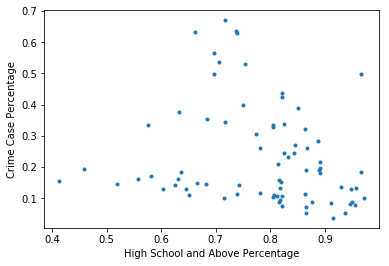

In [11]:
import matplotlib.pyplot as plt

_ = plt.plot(merged_df['HS_%'], merged_df['Crime_over_Population_Aged25'], marker = '.', linestyle='none' )

_ = plt.xlabel('High School and Above Percentage')
_ = plt.ylabel('Crime Case Percentage')

plt.show() # each dot represents a community

In [12]:
def pearson_r(data1, data2):
    corr_coff = np.corrcoef(data1, data2)
    return corr_coff[0, 1]

print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['HS_%'], merged_df['Crime_over_Population_Aged25']))

The Pearson correlation cofficient =  -0.19429691176474526


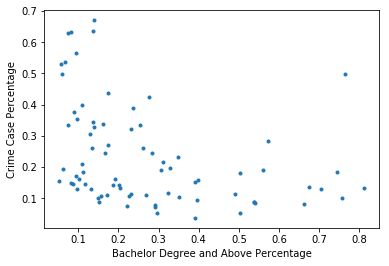

In [13]:
_ = plt.plot(merged_df['BS_%'], merged_df['Crime_over_Population_Aged25'], marker = '.', linestyle='none' )

_ = plt.xlabel('Bachelor Degree and Above Percentage')
_ = plt.ylabel('Crime Case Percentage')

plt.show() # each dot represents a community

In [14]:
print ( "The Pearson correlation cofficient = ", pearson_r(merged_df['BS_%'], merged_df['Crime_over_Population_Aged25']))

The Pearson correlation cofficient =  -0.3607293392253101


####

- the Pearson correlation coefficient between the percentage of people over 25 years old having high school degrees or above and the percentage of the number of crime cases over total 25 years old for a Community Area is - 0.194. There is negative correlation between them.
- the Pearson correlation coefficient between the percentage of people over 25 years old having Bachelor degrees or above and the percentage of the number of crime cases over total 25 years old for a Community Area is - 0.361. There is stronger negative correlation between them.
- It seems that the education plays an important role in the number of crime cases.